##  Market Expansion & Pricing Insights for Zomato Using City-Level Restaurant Data

### Business Problem:

Zomato operates across multiple regions in India, where restaurant density, cuisine preferences, and pricing levels vary significantly by city and zone.
Understanding these regional differences is critical for identifying market saturation, expansion opportunities, and localization strategies.

This project analyzes city- and zone-level restaurant data to uncover:

- Gaps in market penetration

- Regional pricing differences

- Cuisine concentration and diversity patterns

The goal is to translate raw operational data into actionable insights that can support data-driven expansion and regional strategy decisions.

#### Key Questions Addressed

This analysis focuses on answering the following business questions:

- How is Zomato’s restaurant presence distributed across zones, states, and cities?
- Which regions show signs of market saturation or under-penetration?

- How do cuisine preferences vary by region?

- Are there meaningful pricing differences across zones?

- What insights can inform expansion, pricing, and localization strategies?

#### Dataset Overview

Source: Zomato restaurant dataset

Granularity: City-level restaurant listings

Key Attributes:

- City, State, Zone

- Restaurant count and location

- Cuisine types

- Average pricing indicators

#### Analytical Approach

The analysis follows a structured data analytics workflow:

1. Data loading and quality checks

2. Data cleaning and feature engineering

3. Exploratory data analysis (EDA) at city, state, and zone levels

4. Visualization of market presence, cuisine distribution, and pricing patterns

5. Synthesis of insights into business-focused recommendations

#### Tools & Technologies


- Python

- Pandas, NumPy

- Matplotlib, Seaborn, Plotly

- Jupyter Notebook (Google Colab)

#### Expected Outcomes

By the end of this analysis, the project delivers:

- A clear view of Zomato’s regional market distribution

- Identification of high-potential and saturated markets

- Actionable recommendations for expansion and localization

### Project Roadmap

This analysis is structured as follows:

1. Data loading and initial quality checks  
2. Data cleaning and preprocessing  
3. Feature engineering for regional and pricing analysis  
4. Exploratory analysis of:
   - Market presence by zone, state, and city  
   - Cuisine distribution and concentration  
   - Pricing patterns across regions  
5. Key insights and business recommendations  


### 1. Data Loading & Overview

In [63]:
# Configuration
import os
import pandas as pd
DATA_PATH = "/content/zomato_dataset.csv"

In [64]:
import pandas as pd
df = pd.read_csv(DATA_PATH)
df.head(5)


,Restaurant Name,Rating,Cuisine-1,Cuisine-2,Cuisine-3,Cuisine-4,Cuisine-5,Average Price,Average Delivery Time,Safety Measure,Location,State,Zone
0,Campus Bakers,4.3,Bakery,Fast Food,Pizza,Sandwich,Burger,₹50 for one,36 min,Restaurant partner follows WHO protocol,Agra,UP,North
1,Mama Chicken Mama Franky House,4,North Indian,Mughlai,Rolls,Burger,Momos,₹50 for one,22 min,Follows all Max Safety measures to ensure your...,Agra,UP,North
2,GMB - Gopika Sweets & Restaurant,4.2,North Indian,South Indian,Chinese,Fast Food,Street Food,₹50 for one,27 min,Follows all Max Safety measures to ensure your...,Agra,UP,North
3,Shree Bankey Bihari Misthan Bhandar,4.2,Mithai,Street Food,South Indian,Chinese,Ice Cream,₹50 for one,28 min,Restaurant partner follows WHO protocol,Agra,UP,North
4,Burger King,4.2,Burger,Fast Food,Beverages,NaN,NaN,₹50 for one,26 min,Follows all Max Safety measures to ensure your...,Agra,UP,North


In [65]:
df.shape, df.columns


((44891, 13),
 Index(['Restaurant Name', 'Rating', 'Cuisine-1', 'Cuisine-2', 'Cuisine-3',
        'Cuisine-4', 'Cuisine-5', 'Average Price', 'Average Delivery Time',
        'Safety Measure', 'Location', 'State', 'Zone'],
       dtype='object'))

### 2. Data Quality Checks

In [66]:
# Missing values summary
df.isna().sum().sort_values(ascending=False)

,0
Cuisine-5,31349
Cuisine-4,26034
Cuisine-3,18687
Cuisine-2,8705
Cuisine-1,19
Rating,0
Restaurant Name,0
Average Price,0
Average Delivery Time,0
Safety Measure,0


In [67]:
# Duplicate rows
df.duplicated().sum()


np.int64(140)

In [68]:
df.dtypes


,0
Restaurant Name,object
Rating,object
Cuisine-1,object
Cuisine-2,object
Cuisine-3,object
Cuisine-4,object
Cuisine-5,object
Average Price,object
Average Delivery Time,object
Safety Measure,object


### 3. Data Cleaning & Validation

In [69]:
import pandas as pd
import numpy as np

df_raw = pd.read_csv("/content/zomato_dataset.csv")
df_raw[['Average Price', 'Average Delivery Time']].head(10)


,Average Price,Average Delivery Time
0,₹50 for one,36 min
1,₹50 for one,22 min
2,₹50 for one,27 min
3,₹50 for one,28 min
4,₹50 for one,26 min
5,₹50 for one,31 min
6,₹50 for one,29 min
7,₹50 for one,21 min
8,₹50 for one,31 min
9,₹50 for one,28 min


In [70]:
df_clean = df_raw.copy()

# Remove duplicates
df_clean = df_clean.drop_duplicates()

# Standardize cuisine text
cuisine_cols = ['Cuisine-1', 'Cuisine-2', 'Cuisine-3', 'Cuisine-4', 'Cuisine-5']
for col in cuisine_cols:
    df_clean[col] = df_clean[col].astype(str).str.strip().str.title().replace("Nan", pd.NA)

# Rating: extract numeric (handles cases like '4.2/5' too)
df_clean['Rating'] = (
    df_clean['Rating'].astype(str)
    .str.extract(r'(\d+(\.\d+)?)')[0]
)
df_clean['Rating'] = pd.to_numeric(df_clean['Rating'], errors='coerce')

# Average Price: extract first number found
df_clean['Average Price'] = (
    df_clean['Average Price'].astype(str)
    .str.replace(",", "", regex=False)
    .str.extract(r'(\d+)')[0]
)
df_clean['Average Price'] = pd.to_numeric(df_clean['Average Price'], errors='coerce')

# Average Delivery Time: extract first number found (minutes)
df_clean['Average Delivery Time'] = (
    df_clean['Average Delivery Time'].astype(str)
    .str.extract(r'(\d+)')[0]
)
df_clean['Average Delivery Time'] = pd.to_numeric(df_clean['Average Delivery Time'], errors='coerce')

df_clean[['Rating', 'Average Price', 'Average Delivery Time']].head(10)


,Rating,Average Price,Average Delivery Time
0,4.3,50.0,36.0
1,4.0,50.0,22.0
2,4.2,50.0,27.0
3,4.2,50.0,28.0
4,4.2,50.0,26.0
5,4.1,50.0,31.0
6,3.9,50.0,29.0
7,4.1,50.0,21.0
8,4.1,50.0,31.0
9,3.9,50.0,28.0


In [71]:
assert df_clean.shape[0] > 40000, "Unexpected row loss after cleaning"


In [72]:
df_clean[['Rating', 'Average Price', 'Average Delivery Time']].isna().mean().round(3)

#Validate price and delivery time fields
df_clean[['Average Price', 'Average Delivery Time']].describe()

,Average Price,Average Delivery Time
count,44728.000000,43218.000000
mean,173.272983,31.047087
std,92.731470,11.981503
min,10.000000,1.000000
25%,100.000000,24.000000
50%,150.000000,31.000000
75%,200.000000,38.000000
max,2000.000000,190.000000


#### Price & Delivery Time Standardization

- The `Average Price` and `Average Delivery Time` fields were originally stored as text
(e.g., "₹50 for one", "36 min").
- Numeric values were extracted and converted into
standardized numeric formats to enable quantitative analysis and comparison
across regions.

#### Data Validation

- All cleaned numeric fields were validated to ensure realistic ranges and suitability for analysis.  
- No additional transformations were required prior to analysis.


### 4.Exploratory Analysis

#### 4.1 Market Presence Analysis

##### Restaurant distribution by Zone

In [73]:
zone_counts = (
    df_clean['Zone']
    .value_counts()
    .reset_index()
)

zone_counts.columns = ['Zone', 'Restaurant Count']
zone_counts


,Zone,Restaurant Count
0,North,11113
1,Central,10641
2,West,8463
3,East,5426
4,South-1,4660
5,South-2,4448


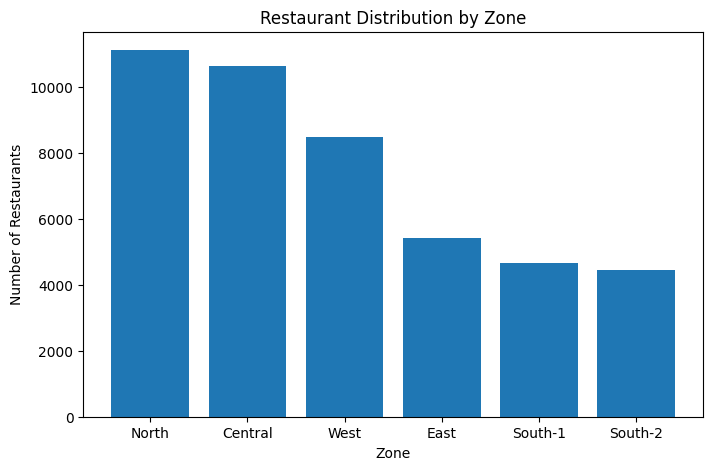

In [74]:
# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(zone_counts['Zone'], zone_counts['Restaurant Count'])
plt.title('Restaurant Distribution by Zone')
plt.xlabel('Zone')
plt.ylabel('Number of Restaurants')
plt.show()


#### Market Presence by Zone – Key Insights

- The North and Central zones account for the highest concentration of restaurant listings, indicating strong market penetration and potentially higher competition.
- The West zone shows moderate presence, suggesting a balance between market maturity and growth opportunity.
- East and South zones have comparatively lower restaurant density, which may indicate under-penetrated markets or untapped expansion opportunities.

#### Business Implications

- Highly saturated zones (North, Central) may require differentiation strategies such as premium listings or targeted promotions.
- Moderate zones (West) present opportunities for selective expansion and optimized onboarding.
- Lower-density zones (East, South) could be prioritized for growth initiatives, partnerships, and localized cuisine expansion.


##### Restaurant distribution by State

In [75]:
state_counts = (
    df_clean.groupby('State')
    .size()
    .reset_index(name='Restaurant Count')
    .sort_values('Restaurant Count', ascending=False)
)

state_counts.head(10)


,State,Restaurant Count
22,UP,7359
13,MH,4690
18,RJ,3902
7,GJ,3320
20,TN,3152
16,PB,2884
23,WB,2440
14,MP,2292
11,KA,1838
0,AP,1621


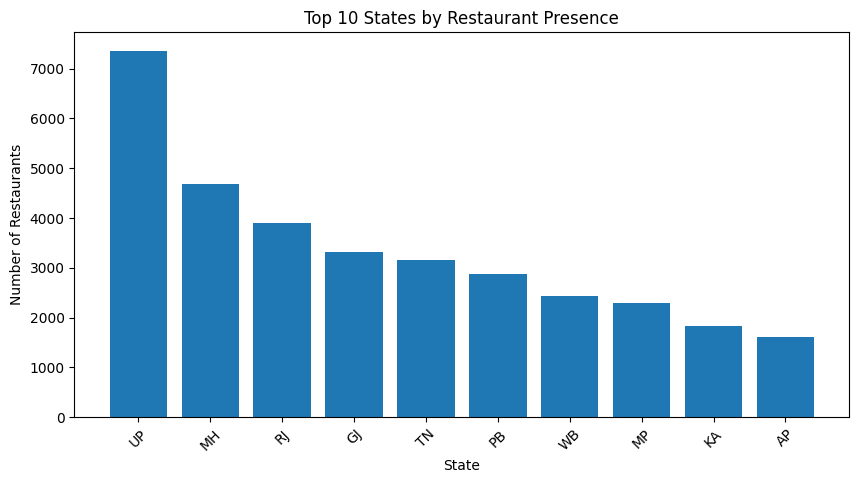

In [76]:
import matplotlib.pyplot as plt

top_states = state_counts.head(10)

plt.figure(figsize=(10,5))
plt.bar(top_states['State'], top_states['Restaurant Count'])
plt.title('Top 10 States by Restaurant Presence')
plt.xlabel('State')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()


#### Market Presence by State - Key Insights

- Restaurant presence is heavily concentrated in a small number of states, with Uttar Pradesh significantly outperforming all others.
- Maharashtra, Rajasthan, Gujarat, and Tamil Nadu represent mature, high-activity markets.
- The sharp decline after the top states indicates uneven platform penetration across regions.


#### Business Implications

- Highly saturated states may benefit more from optimization strategies such as pricing differentiation, premium listings, and retention-focused campaigns.
- Mid- and lower-ranked states present opportunities for controlled expansion through targeted onboarding and regional partnerships.
- State-level prioritization can help allocate marketing and operational resources more efficiently.


##### Restaurant distribution by City

In [77]:
city_counts = (
    df_clean.groupby('Location')
    .size()
    .reset_index(name='Restaurant Count')
    .sort_values('Restaurant Count', ascending=False)
)

city_counts.head(10)


,Location,Restaurant Count
51,Kolkata,1296
48,Kanpur,1183
65,NCR,1128
54,Ludhiana,1003
53,Lucknow,996
36,Hyderabad,900
17,Chandigarh,840
37,Indore,828
18,Chennai,828
23,Dehradun,816


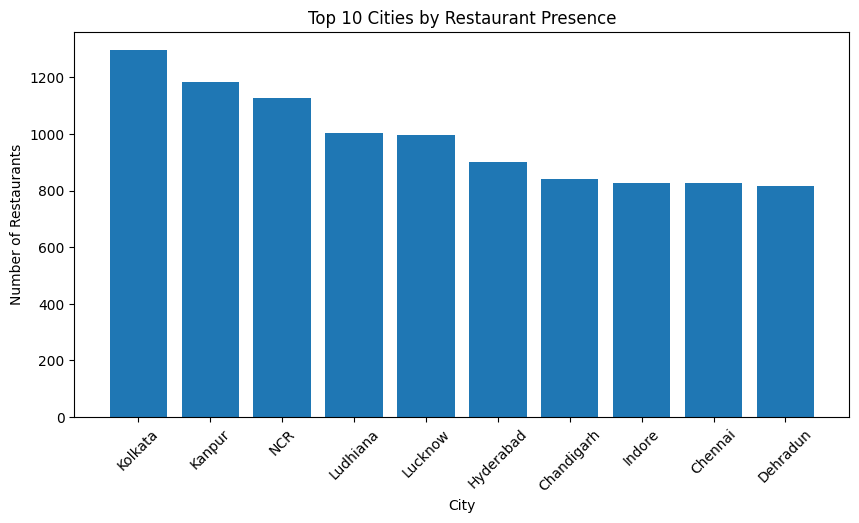

In [78]:
top_cities = city_counts.head(10)

plt.figure(figsize=(10,5))
plt.bar(top_cities['Location'], top_cities['Restaurant Count'])
plt.title('Top 10 Cities by Restaurant Presence')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()


#### Market Presence by City - Key Insights

- Restaurant presence is concentrated in a mix of Tier-1 and Tier-2 cities, indicating strong platform adoption beyond major metros.
- Several Tier-2 cities (Kanpur, Ludhiana, Indore, Dehradun) rank alongside large metropolitan areas, suggesting high demand density in non-metro regions.
- The presence of both saturated metros and high-density Tier-2 cities highlights varying market maturity across locations.

#### Business Implications

- Highly saturated cities may require optimization strategies such as improved discovery, targeted promotions, or premium placements rather than aggressive expansion.
- High-performing Tier-2 cities represent strong opportunities for scalable growth through merchant onboarding and localized cuisine expansion.
- Expansion strategies should be city-specific, balancing saturation levels with demand indicators rather than relying solely on metro classification.



##### Tier-1 vs Tier-2 comparison

In [79]:
tier1_cities = [
    "NCR", "Mumbai", "Delhi", "Bangalore", "Hyderabad",
    "Chennai", "Kolkata", "Pune"
]

df_clean['City Tier'] = df_clean['Location'].apply(
    lambda x: 'Tier 1' if x in tier1_cities else 'Tier 2'
)


In [80]:
tier_summary = (
    df_clean.groupby('City Tier')
    .size()
    .reset_index(name='Restaurant Count')
)

tier_summary


,City Tier,Restaurant Count
0,Tier 1,6244
1,Tier 2,38507


#### Market Presence by Tier-1 vs Tier-2 City - Key Insights

- Tier-2 cities account for a significantly larger share of restaurant listings compared to Tier-1 cities.
- This suggests that Zomato’s adoption and usage extend well beyond major metropolitan areas.
- High restaurant density in Tier-2 cities indicates strong localized demand and scalable growth potential.

### Business Implications

- Expansion and growth strategies should prioritize Tier-2 cities, where platform adoption is already strong.
- Investment in logistics optimization, regional partnerships, and localized marketing can yield high returns in non-metro markets.
- Tier-1 cities may benefit more from experience optimization and premium offerings rather than rapid expansion.



#### Cuisine Diversity Analysis

##### Top cuisines overall

In [81]:
cuisine_cols = ['Cuisine-1', 'Cuisine-2', 'Cuisine-3', 'Cuisine-4', 'Cuisine-5']

cuisine_long = (
    df_clean[cuisine_cols + ['Zone']]
    .melt(id_vars='Zone', value_vars=cuisine_cols, value_name='Cuisine')
    .dropna(subset=['Cuisine'])
)

cuisine_long.head()


,Zone,variable,Cuisine
0,North,Cuisine-1,Bakery
1,North,Cuisine-1,North Indian
2,North,Cuisine-1,North Indian
3,North,Cuisine-1,Mithai
4,North,Cuisine-1,Burger


In [82]:
top_cuisines = (
    cuisine_long['Cuisine']
    .value_counts()
    .head(10)
    .reset_index()
)

top_cuisines.columns = ['Cuisine', 'Count']
top_cuisines


,Cuisine,Count
0,North Indian,17957
1,Chinese,14711
2,Fast Food,14667
3,Beverages,7824
4,Biryani,6911
5,Street Food,6754
6,Desserts,6531
7,Pizza,6301
8,South Indian,5732
9,Sandwich,4614


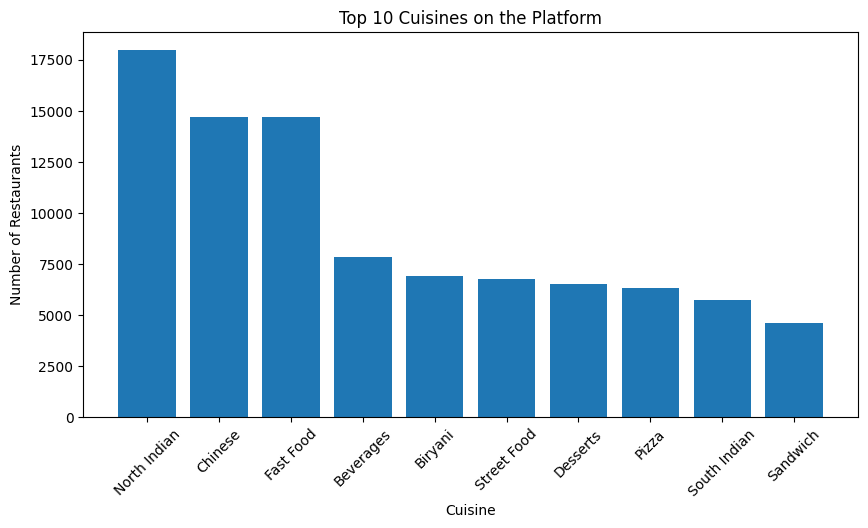

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(top_cuisines['Cuisine'], top_cuisines['Count'])
plt.title('Top 10 Cuisines on the Platform')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()


#### Market Presence by Cuisines - Key Insights

- A small set of cuisines dominates restaurant listings, with North Indian, Chinese, and Fast Food accounting for a large share of the platform.
- The prevalence of quick-service categories suggests strong demand for convenience-driven dining.
- Regional cuisines such as Biryani and South Indian maintain significant presence, reflecting localized food preferences.


#### Business Implications

- Dominant cuisines can be prioritized for high-visibility placements, bundled promotions, and delivery optimization.
- Regional and specialty cuisines present opportunities for differentiation in competitive markets.
- Supporting categories such as beverages and desserts can be leveraged for cross-selling and order value growth.


##### Cuisine distribution by zone

In [84]:
zone_cuisine = (
    cuisine_long
    .groupby(['Zone', 'Cuisine'])
    .size()
    .reset_index(name='Count')
)

zone_cuisine.head()


,Zone,Cuisine,Count
0,Central,Afghan,8
1,Central,Afghani,1
2,Central,American,31
3,Central,Andhra,9
4,Central,Arabian,11


In [85]:
top_zone_cuisine = (
    zone_cuisine
    .sort_values(['Zone', 'Count'], ascending=[True, False])
    .groupby('Zone')
    .head(5)
)

top_zone_cuisine


,Zone,Cuisine,Count
65,Central,North Indian,4764
28,Central,Fast Food,3781
22,Central,Chinese,3498
72,Central,Pizza,1769
85,Central,Street Food,1647
165,East,North Indian,2508
119,East,Chinese,2431
126,East,Fast Food,1585
111,East,Biryani,1173
109,East,Beverages,795


#### Market Presence of Cuisines by Zone – Key Insights

- North Indian cuisine consistently ranks as the top category across all zones, indicating broad nationwide appeal.
- Fast Food and Chinese cuisines show strong, uniform presence, reflecting high demand for convenience-driven dining across regions.
- Clear regional specialization is visible, with South Indian cuisine dominating southern zones and Street Food performing strongly in Central and West regions.
- Biryani shows higher concentration in East and South-1 zones, highlighting localized taste preferences.

#### Business Implications

- Nationally dominant cuisines (North Indian, Fast Food, Chinese) should form the backbone of platform-wide promotions and visibility strategies.
- Region-specific cuisine strengths can be leveraged for localized marketing, onboarding, and recommendation algorithms.
- Expanding underrepresented cuisines in specific zones can help diversify offerings and reduce competitive saturation.




#### Regional Specialization Insights

- Clear regional cuisine specialization is observed across zones, reflecting local cultural and consumption preferences.
- Southern zones show strong dominance of South Indian cuisine, while Central and West zones exhibit higher concentration of Street Food.
- Biryani demonstrates higher regional concentration in East and South-1 zones, indicating localized demand clusters.
- Despite regional variation, North Indian cuisine maintains consistent dominance across all zones, highlighting its nationwide appeal.


#### 4.3 Pricing Pattern Analysis

##### Average price by zone

In [86]:
zone_price = (
    df_clean
    .groupby('Zone')['Average Price']
    .mean()
    .reset_index()
    .sort_values('Average Price', ascending=False)
)

zone_price


,Zone,Average Price
2,North,182.508953
3,South-1,180.642320
1,East,178.922907
5,West,169.030618
4,South-2,167.123257
0,Central,163.459231


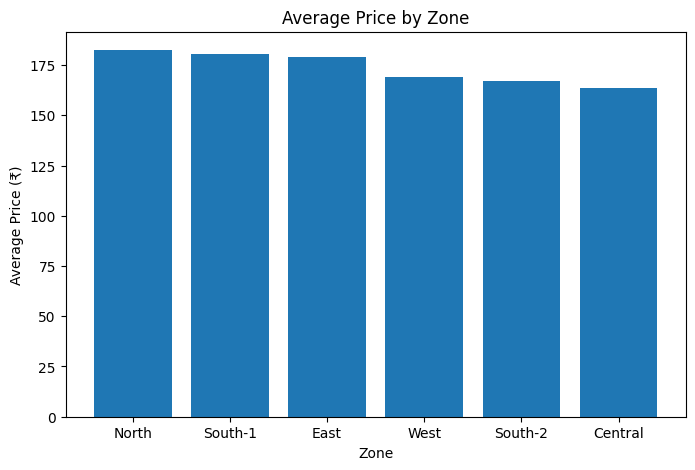

In [87]:
plt.figure(figsize=(8,5))
plt.bar(zone_price['Zone'], zone_price['Average Price'])
plt.title('Average Price by Zone')
plt.xlabel('Zone')
plt.ylabel('Average Price (₹)')
plt.show()


#### Market Presence of Pricing Patterns by Zone - Key Insights

- Average prices are highest in the North zone, suggesting a stronger presence of premium or higher-priced restaurants.
- South-1 and East zones also exhibit relatively higher average pricing, indicating similar consumer spending patterns.
- Central and South-2 zones show lower average prices, pointing toward more price-sensitive markets.
- Overall pricing differences across zones are moderate, suggesting room for differentiated pricing strategies rather than uniform pricing.

#### Business Implications

- Premium positioning and higher-margin offerings may perform better in North, South-1, and East zones.
- Value-focused promotions and budget-friendly listings may be more effective in Central and South-2 zones.
- Zone-level pricing insights can inform targeted discounting, delivery fee optimization, and merchant onboarding strategies.



#### Price Sensitivity Insights

- Average pricing varies moderately across zones, suggesting differences in consumer spending capacity and price sensitivity.
- North, South-1, and East zones display relatively higher average prices, indicating potential tolerance for premium offerings.
- Central and South-2 zones exhibit lower average prices, pointing toward more price-sensitive consumer behavior.
- The absence of extreme price variation across zones suggests opportunities for targeted pricing strategies rather than uniform discounting.


### Conclusion

This analysis examined Zomato’s restaurant ecosystem across cities, states, and zones to understand market penetration, cuisine diversity, and pricing behavior.  
The findings reveal that Zomato’s growth is driven not only by major metropolitan areas but significantly by Tier-2 cities, where restaurant density and demand are strong.

Cuisine analysis highlights both nationwide preferences and regional specialization, emphasizing the importance of localized strategies.  
Pricing patterns show moderate variation across zones, suggesting opportunities for zone-specific positioning rather than uniform pricing models.

Overall, the analysis demonstrates how regional data can be leveraged to guide expansion, optimization, and localization strategies in a competitive food delivery marketplace.



#### Overall Key Insights

- Zomato’s restaurant presence is highly uneven across regions, with North and Central zones showing the strongest market penetration.
- Tier-2 cities account for the majority of restaurant listings, highlighting significant platform adoption beyond major metropolitan areas.
- Cuisine demand is highly concentrated, with North Indian, Fast Food, and Chinese cuisines dominating across all regions.
- Clear regional specialization exists, such as strong South Indian cuisine presence in southern zones and higher popularity of Street Food in Central and West zones.
- Pricing varies moderately by zone, with North, South-1, and East zones exhibiting higher average prices compared to more price-sensitive Central and South-2 zones.


#### Business Recommendations

- Prioritize expansion and merchant onboarding in high-performing Tier-2 cities, where demand density and scalability potential are strong.
- Focus on differentiation strategies in highly saturated zones (North and Central), such as premium listings, improved discovery, and targeted promotions.
- Leverage dominant cuisines for platform-wide campaigns while using region-specific cuisine preferences for localized marketing efforts.
- Implement zone-level pricing and promotional strategies based on observed average price differences across zones to align with regional spending behavior and maximize conversion.
- Explore cross-selling opportunities by bundling popular cuisine categories with high-demand add-ons such as beverages and desserts.


#### Limitations & Next Steps

- The dataset does not include order volume or revenue metrics, limiting the ability to assess demand intensity beyond restaurant count.
- City tier classification was based on a simplified definition and may not capture all urban nuances.
- Future analysis could incorporate customer order data, time-based trends, and customer ratings to strengthen demand forecasting.
- Integrating delivery distance and logistics performance could further enhance operational optimization insights.
